# Directed graphs in `networkx`

The `networkx` package has ways of working with directed graphs, or "digraphs", just as with undirected graphs. Here's a brief rundown of what you can do. 

First, let's load up the package: 

In [1]:
import networkx as nx

One way to create a digraph is to start with an empty digraph and add edges. This process is similar to how we do it with undirected graphs with **two important exceptions**. 

First, there is a different constructor for the empty graph: Instead of running `G = nx.Graph()`, we run `G = nx.DiGraph()`. 

In [2]:
G = nx.DiGraph()

Note both the "D" and the "G" there are capitalized; Python will throw an error if the capitalization is wrong. 

Second, edges are still represented as pairs of nodes; but these are now *directed* edges, so **the ordering of the first and second elements of the pair matters**: $(0,1)$ is an edge *from* node 0 *to* node 1, for example, and that's different than $(1,0)$ which connected the same vertices but points in the opposite direction. 

We can add directed edges one at a time: 

In [3]:
G.add_edge(0,1)

Or all at once from a list: 

In [4]:
G.add_edges_from([(1,2), (3,1), (0,3)])

Notice, these are the same functions for adding edges as with undirected graphs! Python knows that these edges are directed because $G$ was defined as a `DiGraph`, so we don't need to tell it again that the edges are directed. 

Visualizing a digraph is the same process as with an undirected graph. Notice, the edges now have little arrowheads on them.

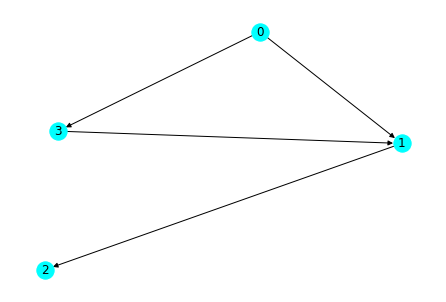

In [10]:
nx.draw(G, with_labels = True, node_color = "cyan")

If you want to make a *random* digraph, on the other hand, you have to feed the drawing function an additional parameter `directed = True` to inform Python that you want a digraph, not an undirected graph: 

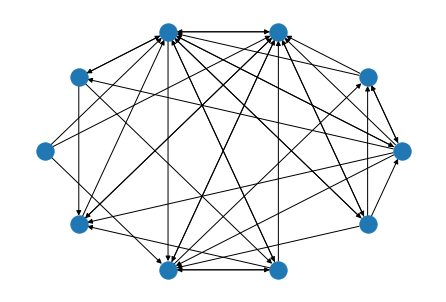

In [6]:
random_digraph = nx.gnp_random_graph(10, 0.4, directed = True)
nx.draw_circular(random_digraph)

## Representing digraphs

The simplest way to represent a digraph as a data structure, and the way we will typically do it, is as a list of directed edges. You can get the directed edge list from a graph like this: 

In [7]:
G.edges()

OutEdgeView([(0, 1), (0, 3), (1, 2), (3, 1)])

We can also represent graphs as adjacency matrices, just like we do with undirected graphs, but we put a `1` in the row for vertex $a$ and column for vertex $b$, if there is an edge *from* $a$ *to* $b$. Since edges don't go both directions this time, this may create an "asymmetric" matrix. 

Here is the matrix for the graph $G$ above: 

| vertex | 0 | 1 | 2 | 3 |
|------- | --  | --- | --- | --- | 
| 0 | 0 | 1 | 0 | 1 |
| 1 | 0 | 0 | 1 | 0 | 
| 2 | 0 | 0 | 0 | 0 | 
| 3 | 0 | 1 | 0 | 0 | 

Again, notice that the row/column matters. For example there is a 1 in the row for 0 and column for 3 because there is an edge pointing from 0 to 3. But there's no edge from 3 to 0, so there is a 0 in the row for 3 and column for 0. 

We can use the same function, `.to_pandas_adjacency`, that we use for undirected graphs to represent a digraph as an adjacency matrix. 


In [8]:
nx.to_pandas_adjacency(G)

,0,1,2,3
0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0


And we can represent digraphs as dictionaries, in the same way we do it with undirected graphs, and we can use the same function in `networkx` to convert digraphs to dictionaries. There is an important difference, however, from undirected graphs in that **a vertex appears in the list following a key vertex only if there is an edge from the key to the other vertex**. For example: 

In [9]:
nx.to_dict_of_lists(G)

{0: [1, 3], 1: [2], 2: [], 3: [1]}

Notice, `3` appears in the list for `0` but not vice versa because there is an edge from 0 to 3, but not the other way. 